# KELOMPOK 5 ( CUSTOMER PROPERTY)

### Fikrie Hartanta Sembiring (1206210007) 
### Inge Faradila Efaranti (1206210017) 
### Astikhatul Mufaidah (1206210020) 

# Permasalahan

Untuk mengembangkan bisnis property, pengembang membutuhkan analisis terhadap customer  untuk mempermudah developer dan agen-agen property dalam menentukan target pasar mereka. Oleh karena itu, tim pengembangan membutuhkan informasi lebih dari data-data yang pernah mereka kumpulkan dari aplikasi yang telah mereka buat. kami di berikan sebuah dataset tentang perilaku customer yang cenderung berbeda-beda tergantung dengan kebutuhan personal masing-masing.  


Setelah mengolah data dan menganalisis data yang ada kami mengambil beberapa informasi terkait kecenderunga customer mulai dari mereka membeli rumah yang kosongan saja atau berisi furniture , jadi atau tidaknya mereka membeli berdasarkan Website tempat pengiklan dan kecenderungan memilih kamar pada pasangan yang belum mempunyai anak. 

# Cleaning, Exploration and Modeling Data

In [1]:
#IMPORT LIBRARY 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
data = pd.read_csv('Customer Property (1).csv', sep=',')
data

,id,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,package,channel_id,buying_date,dealing_date,adults,children,room,destination_id,destination_type,dealing,regency_continent,regency_country,regency_market,cnt,regency_cluster
0,144,12/2/2013 1:48,24,2,3,64,12576,NaN,2451,0,0,4,3/3/2014,3/4/2014,2,0,1,53949,3,0,1,6,105,29,99
1,170,7/18/2014 1:00,24,2,3,64,12576,NaN,2451,0,0,2,8/30/2014,8/31/2014,2,0,1,8746,1,0,1,6,105,29,99
2,181,7/18/2014 2:09,24,2,3,64,12576,NaN,2451,0,0,2,8/27/2014,8/28/2014,2,0,1,17823,1,0,1,6,105,770,99
3,185,7/18/2014 2:24,24,2,3,64,12576,NaN,2451,0,0,2,8/27/2014,8/28/2014,2,0,1,17823,1,0,1,6,105,770,99
4,191,8/9/2014 3:23,24,2,3,64,4777,NaN,2451,0,0,2,8/30/2014,8/31/2014,2,0,1,8746,1,0,2,6,105,29,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343578,37332841,1/30/2013 10:59,11,3,205,155,13951,2790.5298,3873,0,0,3,2/25/2013,2/27/2013,2,1,1,8260,1,0,2,2,50,701,0
343579,37333630,1/12/2014 16:29,2,3,66,335,5007,1203.9173,7318,1,1,1,2/14/2014,2/21/2014,2,0,1,49090,6,0,3,2,50,685,0
343580,37333909,7/11/2014 15:52,33,2,194,38,42328,NaN,9384,0,0,5,12/8/2014,12/13/2014,2,3,1,12548,5,0,2,2,50,212,0
343581,37333911,7/11/2014 16:30,33,2,194,38,42328,NaN,9384,0,0,5,12/8/2014,12/13/2014,2,2,1,12548,5,0,4,2,50,212,0


In [2]:
#MENGHAPUS DATA YANG TIDAK ADA

data1 = data.dropna()
data1

,id,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,package,channel_id,buying_date,dealing_date,adults,children,room,destination_id,destination_type,dealing,regency_continent,regency_country,regency_market,cnt,regency_cluster
22,744,12/26/2014 20:01,2,3,66,143,6959,1325.5468,3994,0,1,9,2/5/2015,2/10/2015,2,0,1,8831,1,0,1,2,50,655,99
23,853,11/10/2014 17:22,13,1,46,171,15334,390.2201,4539,0,0,9,5/9/2015,5/12/2015,2,0,1,6898,3,0,1,6,144,777,99
24,857,9/14/2014 14:31,11,3,205,354,44764,288.2286,4704,1,0,0,2/14/2015,2/15/2015,2,0,1,8262,1,0,1,2,198,384,99
26,984,6/11/2014 13:45,11,3,205,354,25315,169.2044,6450,0,0,5,7/15/2014,7/16/2014,2,0,1,11361,1,0,1,2,50,591,99
27,1522,9/23/2014 22:10,2,3,66,174,21356,1631.5366,7523,1,0,2,11/6/2014,11/10/2014,4,0,1,8787,1,0,1,4,8,109,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343569,37002085,12/14/2014 23:48,2,3,66,174,48479,64.6041,7777,0,0,1,12/21/2014,12/22/2014,2,0,1,8835,1,0,1,2,50,357,0
343575,37332761,3/30/2014 11:25,2,3,66,174,47287,2571.4102,2526,1,1,9,4/21/2014,4/24/2014,2,2,1,669,3,0,3,2,50,212,0
343576,37332763,10/28/2014 16:24,2,3,66,174,25897,2601.2859,2526,1,1,9,11/25/2014,11/29/2014,2,2,1,669,3,0,5,2,50,212,0
343578,37332841,1/30/2013 10:59,11,3,205,155,13951,2790.5298,3873,0,0,3,2/25/2013,2/27/2013,2,1,1,8260,1,0,2,2,50,701,0


## Analisis 1

In [3]:
#MENCARI JENIS NILAI YANG UNIK continent_id UNTUK MENGETAHUI CUSTOMER DARI BENUA APA SAJA

data.continent_id.unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [4]:
#KAMI MENGAMBIL DATA PACKAGE 0 YAITU YANG MEMBELI RUMAH HANYA KOSONGAN SAJA

beli_saja = data1[(data1['package'] == 0)]
beli_saja

,id,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,package,channel_id,buying_date,dealing_date,adults,children,room,destination_id,destination_type,dealing,regency_continent,regency_country,regency_market,cnt,regency_cluster
23,853,11/10/2014 17:22,13,1,46,171,15334,390.2201,4539,0,0,9,5/9/2015,5/12/2015,2,0,1,6898,3,0,1,6,144,777,99
24,857,9/14/2014 14:31,11,3,205,354,44764,288.2286,4704,1,0,0,2/14/2015,2/15/2015,2,0,1,8262,1,0,1,2,198,384,99
26,984,6/11/2014 13:45,11,3,205,354,25315,169.2044,6450,0,0,5,7/15/2014,7/16/2014,2,0,1,11361,1,0,1,2,50,591,99
27,1522,9/23/2014 22:10,2,3,66,174,21356,1631.5366,7523,1,0,2,11/6/2014,11/10/2014,4,0,1,8787,1,0,1,4,8,109,99
34,1825,12/4/2014 10:23,11,3,205,354,41495,6873.3591,7899,0,0,9,5/23/2015,5/25/2015,3,0,1,468,1,0,1,3,48,153,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343559,37001007,11/13/2014 8:55,2,3,66,174,25951,65.9694,4083,0,0,2,11/13/2014,11/14/2014,2,0,1,9147,1,1,1,2,50,367,0
343560,37001134,1/29/2013 20:06,2,3,66,174,967,79.3316,5125,0,0,1,3/17/2013,3/22/2013,2,0,1,9147,1,0,3,2,50,367,0
343561,37001267,8/18/2014 13:26,2,3,66,356,22202,2611.5367,5125,0,0,9,12/9/2014,12/12/2014,2,0,1,8856,1,0,1,2,50,636,0
343569,37002085,12/14/2014 23:48,2,3,66,174,48479,64.6041,7777,0,0,1,12/21/2014,12/22/2014,2,0,1,8835,1,0,1,2,50,357,0


In [5]:
#KAMI MENGAMBIL DATA PACKAGE 1 YAITU YANG MEMBELI DENGAN FURNITUR

beli_furnitur = data1[(data1['package'] == 1)]
beli_furnitur

,id,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,package,channel_id,buying_date,dealing_date,adults,children,room,destination_id,destination_type,dealing,regency_continent,regency_country,regency_market,cnt,regency_cluster
22,744,12/26/2014 20:01,2,3,66,143,6959,1325.5468,3994,0,1,9,2/5/2015,2/10/2015,2,0,1,8831,1,0,1,2,50,655,99
28,1627,8/19/2014 16:12,2,3,66,260,120,1778.8514,7638,0,1,9,6/18/2015,6/25/2015,2,0,1,8816,1,0,2,4,163,1935,99
30,1674,6/10/2013 20:00,2,3,66,226,9427,1140.8046,7783,0,1,2,12/20/2013,1/1/2014,1,0,1,1152,1,0,1,4,47,1502,99
31,1675,6/10/2013 20:42,2,3,66,226,9427,1140.8046,7783,0,1,2,12/21/2013,1/2/2014,1,0,1,1152,1,1,1,4,47,1502,99
33,1782,10/17/2014 10:25,11,3,205,354,25315,435.3683,7899,0,1,9,2/13/2015,2/16/2015,2,0,1,8230,1,0,3,2,50,637,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343567,37001968,8/26/2014 20:56,2,3,66,337,48754,932.8216,7099,0,1,2,1/12/2015,1/17/2015,3,0,1,8268,1,0,4,2,50,682,0
343568,37001969,8/26/2014 21:47,2,3,66,337,48754,932.8216,7099,0,1,2,1/13/2015,1/18/2015,3,0,1,8268,1,1,1,2,50,682,0
343575,37332761,3/30/2014 11:25,2,3,66,174,47287,2571.4102,2526,1,1,9,4/21/2014,4/24/2014,2,2,1,669,3,0,3,2,50,212,0
343576,37332763,10/28/2014 16:24,2,3,66,174,25897,2601.2859,2526,1,1,9,11/25/2014,11/29/2014,2,2,1,669,3,0,5,2,50,212,0


In [6]:
#MENGGUNAKAN GROUPBY UNTUK MENGAMBIL DAN MEMBANDINGKAN PEMBELIAN RUMAH
#KOSONGAN DENGAN MEMBELI RUMAH BERFURNITUR DI 5 BENUA YANG BERBEDA

group = data1.groupby(['continent_id','package'])['id'].aggregate('count').unstack()
group.columns = ['rumah kosongan', 'beli dengan furniture']
group

,rumah kosongan,beli dengan furniture
continent_id,,
0,1414,338
1,15215,6944
2,2775,217
3,81672,25362
4,9462,2112


<AxesSubplot:xlabel='continent_id'>

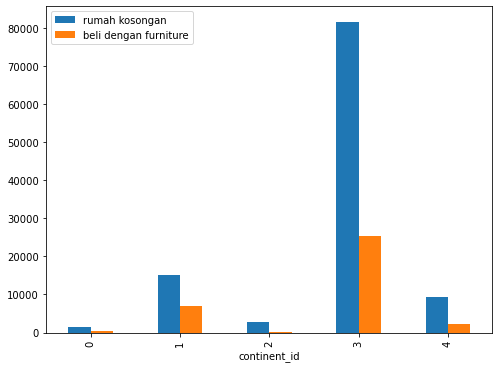

In [7]:
#VISUALISASI PEMBELIAN RUMAH KOSONGAN DAN BELI DENGAN FURNITUR

group.plot(kind="bar", figsize=(8, 6))

In [8]:
#MEMBUAT DATAFRAME UNTUK MEMVISUALISASIKAN PEMBELIAN DI BENUA 3

data_furnitur = {'Rumah Kosongan':[81672],
                 'Membeli dengan Furniture':[25362],}
frame = pd.DataFrame(data_furnitur, columns=['Rumah Kosongan', 'Membeli dengan Furniture'], index = ['Total'])
frameT = frame.T
frameT

,Total
Rumah Kosongan,81672
Membeli dengan Furniture,25362


<function matplotlib.pyplot.show(close=None, block=None)>

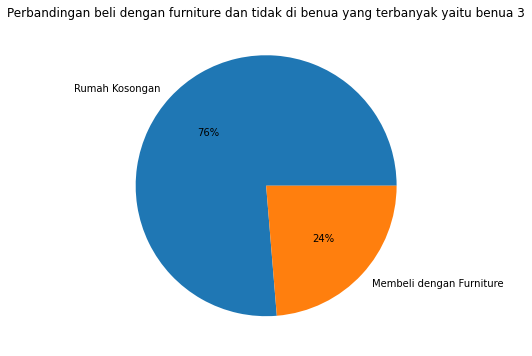

In [9]:
#MEMVISUALISASIKAN PEMBELIAN RUMAH DI BENUA 3

fig = plt.figure(figsize = (6,6))
ax = plt.axes()
ax.pie(frameT['Total'],labels = ['Rumah Kosongan','Membeli dengan Furniture'], autopct = "%1.0f%%")
ax.set_title("Perbandingan beli dengan furniture dan tidak di benua yang terbanyak yaitu benua 3")
plt.show

In [10]:
#MEMBUAT DATAFRAME UNTUK MEMVISUALISASIKAN PEMBELIAN DI BENUA 1

data_furnitur = {'Rumah Kosongan':[1414],
                 'Membeli dengan Furniture':[338],}
frame = pd.DataFrame(data_furnitur, columns=['Rumah Kosongan', 'Membeli dengan Furniture'], index = ['total'])
frameL = frame.T
frameL

,total
Rumah Kosongan,1414
Membeli dengan Furniture,338


<function matplotlib.pyplot.show(close=None, block=None)>

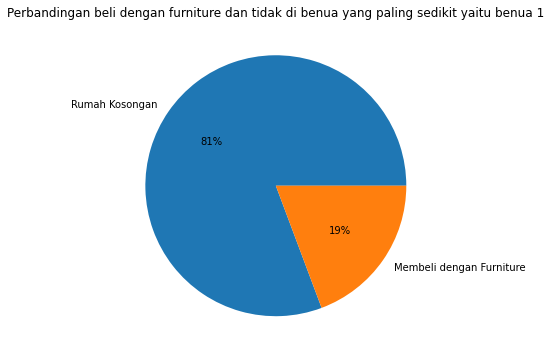

In [11]:
#MEMVISUALISASIKAN PEMBELIAN RUMAH DI BENUA 1

fig = plt.figure(figsize = (6,6))
ax = plt.axes()
ax.pie(frameL['total'],labels = ['Rumah Kosongan','Membeli dengan Furniture'], autopct = "%1.0f%%")
ax.set_title("Perbandingan beli dengan furniture dan tidak di benua yang paling sedikit yaitu benua 1")
plt.show

## Hasil Analisis 1

Dapat dilihat dari table continent_id untuk 5 benua, benua yang paling banyak membeli rumah ada pada benua ke-3 yaitu rumah kosongan sebanyak 81672 dan rumah dengan furniture 25362 dengan persentase 76% untuk rumah kosongan dan 24% untuk customer yang membeli dengan furniture. Benua yang paling sedikit membeli rumah ada pada benua 0 dengan rumah kosongan sebanyak 1414 dan rumah dengan furniture 338.  

Jadi untuk developer dan agen-agen property bisa memprioritaskan penjualan di benua 3 karena banyaknya peminat rumah kosongan dan rumah berfurniture di benua tersebut supaya developer dan para agen mendapat keuntungan yang lebih besar dibanding benua 0 yang mana sangat sepi peminat. Tapi jika agen pemasaran bisa mendongkrang penjualan di benua 0 kemungkinan untung yang di dapat akan sangat besar karena mungkin saja peminatnya besar tapi developernya kurang dalam memasarkan property mereka. 

## Analisis 2

In [12]:
#MENCARI JENIS NILAI YANG UNIK channel_id UNTUK MENGETAHUI CUSTOMER MENDAPAT INFO DARI WEBSITE MANA SAJA

data.channel_id.unique()

array([ 4,  2,  0,  9,  5,  1,  3,  7,  6,  8, 10], dtype=int64)

In [13]:
#MEMAKAI PIVOT UNTUK MENGAMBIL JUMLAH ORANG YANG MEMBELI DAN TIDAK JADI MEMBELI DI SETIAP WEBSITE

pivot1 = pd.pivot_table(data1,index = 'channel_id', columns = 'dealing',values = 'id', aggfunc = 'count')
pivot1.columns = ['Tidak deal', 'Deal']
pivot1

,Tidak deal,Deal
channel_id,,
0,15372,1175
1,11859,912
2,11675,710
3,6226,388
4,2237,321
5,12027,1347
6,102,4
7,1125,63
8,425,21


<AxesSubplot:xlabel='channel_id'>

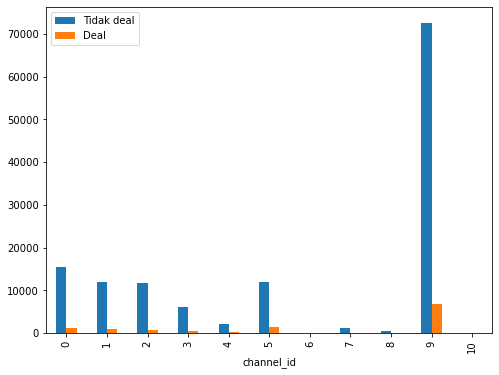

In [14]:
#VISUALISASI CUTOMER YANG MEMBELI DAN TIDAK JADI MEMBELI DI SETIAP WEBSITE

pivot1.plot(kind="bar", figsize=(8, 6))

In [15]:
#MEMBUAT DATAFRAME UNTUK MEMVISUALISASIKAN CUSTOMER YANG 
#DEAL DAN TIDAK DEAL DI WEBSITE 9

data_situs = {'Tidak deal':[72652],
              'Deal':[6837],}
frame1T = pd.DataFrame(data_situs, columns=['Tidak deal', 'Deal'], index = ['Jumlah'])
frame2T = frame1T.T
frame2T

,Jumlah
Tidak deal,72652
Deal,6837


<function matplotlib.pyplot.show(close=None, block=None)>

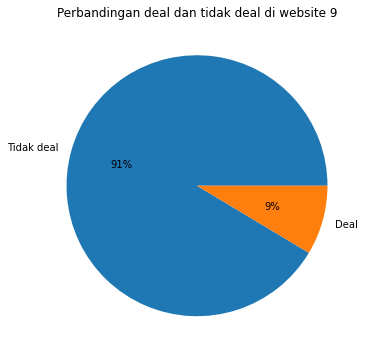

In [16]:
#MEMVISUALISASIKAN CUSTOMER YANG 
#DEAL DAN TIDAK DEAL DI WEBSITE 9

fig = plt.figure(figsize = (6,6))
ax = plt.axes()
ax.pie(frame2T['Jumlah'],labels = ['Tidak deal','Deal'], autopct = "%1.0f%%")
ax.set_title("Perbandingan deal dan tidak deal di website 9")
plt.show

## Hasil Analisis 2

Dari data diatas kami mendapatkan beberapa informasi tentang banyaknya transaksi deal dan tidak deal yang terjadi di 11 Website yaitu Website 0-11. Banyaknya transaksi ini merupakan celah bagi developer dan agen agen untuk bisa memasarkan produknya di website yang terbilang cukup populer yaitu website dengan terjadinya transaksi terbesar adalah website 9 dengan perbandingan deal 9% dan tidak deal 91%. Walaupun banyak yang tidak bertransaksi tapi dapat dilihat dari visualisasi data kami bahwa website 9 adalah website dengan transaksi terbesar diantara website yang lain.  

Jadi developer dan para agen bisa focus untuk penjualan di website 9 karena banyaknya peminat yang sudah bertransaksi disana dan jika banyak customer sudah percaya ke website tersebut maka akan banyak customer baru yang sedang mencari property akan tertarik dan mungkin saja akan membeli property tersebut. ada juga kemungkinan penyebab tidak terjadinya transaksi di website 9 yaitu harga yang tidak sesuai mungkin bagi para developer dan para aen bisa mulai untuk memberikan diskon yang menarik bagi para customer agar penawaran tersebut bisa menjadi salah satu pertimbangan bagi mereka.  

Kelebihan dalam penjualan di website 9 juga cukup banyak. Salah satunya adalah peminatnya yang banyak serta terjadinya transaksi yang terbilang paling banyak diantara website-website yang lain sehingga membuat customer lebih percaya kepada website tersebut.

## Analisis 3

In [17]:
#MEMBUAT PIVOT KEDUA UNTUK MENGETAHUI BERAPA BANYAK CUSTOMER YANG 
#TIDAK PUNYA ANAK MEMILIH BERAPA KAMAR YANG INGIN MEREKA BELI

tidakada_anak = data1[(data1["children"] == 0 )]
pivot2 = pd.pivot_table(tidakada_anak,index = 'room', columns = 'children',values = 'id', aggfunc = 'count')
pivot2.columns = ['Tidak Punya Anak']
pivot2

,Tidak Punya Anak
room,
1,105041
2,6287
3,1231
4,312
5,179
6,81
7,22
8,111


Text(0.5, 1.0, 'Melihat perilaku Customer yang tidak punya anak membeli Rumah dengan berapa Kamar')

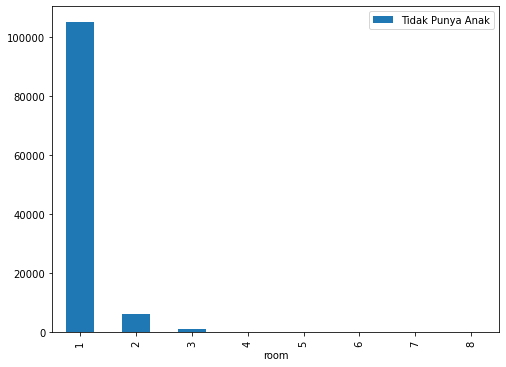

In [18]:
#VISUALISASI CUTOMER YANG TIDAK MEMPUNYAI ANAK MEMBELI RUMAH BERAPA KAMAR

pivot2.plot(kind="bar", figsize=(8, 6))
ax.set_title("Melihat perilaku Customer yang tidak punya anak membeli Rumah dengan berapa Kamar")

In [19]:
#MEMBUAT DATAFRAME UNTUK MEMVISUALISASIKAN CUSTOMER YANG 
#TIDAK PUNYA ANAK MEMBELI KAMAR 1 ATAU 2

kecenderungan = {'kamar 1':[105041],
              'kamar 2':[6287],}
frame1anak = pd.DataFrame(kecenderungan, columns=['kamar 1', 'kamar 2'], index = ['Tidak Punya Anak'])
frame2anak = frame1anak.T
frame2anak

,Tidak Punya Anak
kamar 1,105041
kamar 2,6287


<function matplotlib.pyplot.show(close=None, block=None)>

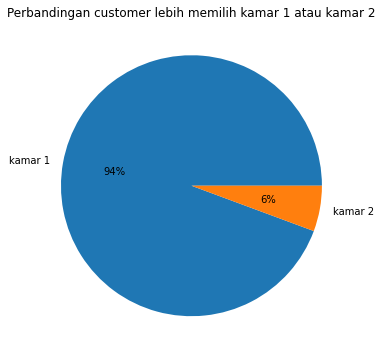

In [20]:


fig = plt.figure(figsize = (6,6))
ax = plt.axes()
ax.pie(frame2anak['Tidak Punya Anak'],labels = ['kamar 1','kamar 2'], autopct = "%1.0f%%")
ax.set_title("Perbandingan customer lebih memilih kamar 1 atau kamar 2")
plt.show

## Hasil Analisis 3

Dari data dan visualisasi diatas kami mendapat informasi customer yang baru menikah ataupun sudah menikah tapi belum memiliki anak lebih cenderung membeli rumah dengan 1 kamar bahkan angka yang di dapat mencapai 100 ribu lebih Customer. Ini bisa menjadi peluang besar bagi developer dan para agen untuk menjual property rumah dengan 1 kamar jika target pasar mereka adalah pasangan yang belum mempunyai anak. dapat dilihat di visualisasi tersebut jarak kecenderungan antara Customer yang milih 1 kamar dan 2 kamar sangat sangat jauh bahkan yaitu kamar 1 dengan 94% dan kamar 2 dengan 6%.  

Jadi langkah yang bisa diambil developer adalah memperbanyak stok rumah 1 pintu dapat dilihat juga sekarang banyak pasangan muda yang sedang membutuhkan rumah apalagi rumah 1 pintu bisa sangat membanting harga dan biaya pembuatannya juga terbilang cukup dibawah rumah dengan 2 – 8 pintu karena itu ini bisa menjadi keuntungan yang sangat besar bagi para agen dan developer tentunya. 